# **Classification Model: Breast Cancer Prediction**
---


### **Objective**
Predict whether a tumor is **malignant** or **benign** using the **Breast Cancer Wisconsin Dataset**. Compare multiple classification models and visualize results.

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.facecolor'] = '#e0f7f7'
plt.rcParams['axes.edgecolor'] = '#20B2AA'
plt.rcParams['axes.labelcolor'] = '#20B2AA'
plt.rcParams['xtick.color'] = '#20B2AA'
plt.rcParams['ytick.color'] = '#20B2AA'
plt.rcParams['text.color'] = '#20B2AA'

### **Load Dataset & Preprocessing**

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from IPython.display import display

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')


df_combined = pd.concat([X, y], axis=1)


display(
    df_combined.head().style.set_table_styles(
        [
            {'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
            {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}
        ]
    )
)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,0
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,0
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,0
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,0
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,0


### **Train Multiple Classification Models**

In [14]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### **Evaluate Models**

In [15]:
# Accuracy
accuracy = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'KNN': accuracy_score(y_test, y_pred_knn)
}
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model','Accuracy'])
accuracy_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
     {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}]
)

,Model,Accuracy
0,Logistic Regression,0.973684
1,Decision Tree,0.947368
2,KNN,0.947368


### **Confusion Matrices**

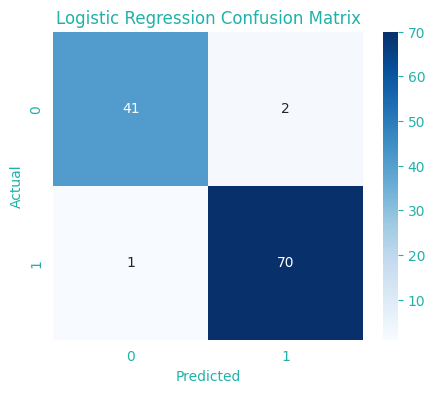

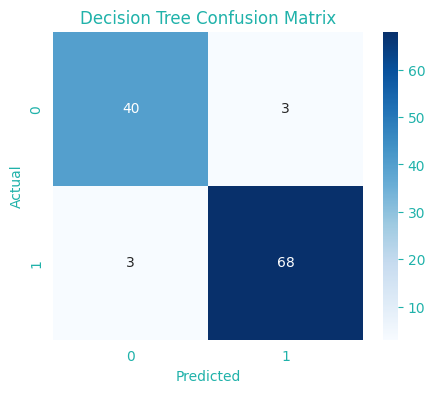

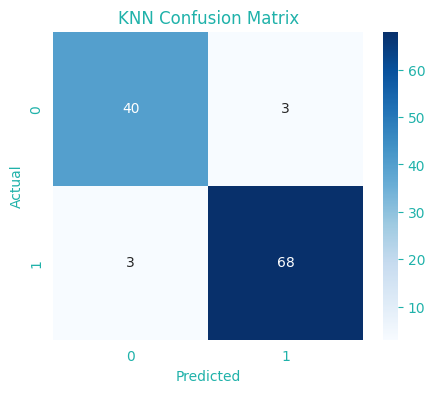

In [16]:
models_preds = {'Logistic Regression': y_pred_lr, 'Decision Tree': y_pred_dt, 'KNN': y_pred_knn}
for name, pred in models_preds.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix', color='#20B2AA')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### **Classification Reports**

In [21]:
from IPython.display import display, Markdown
import pandas as pd
from sklearn.metrics import classification_report

for name, pred in models_preds.items():

    display(Markdown(f"### **{name}**"))


    report_dict = classification_report(y_test, pred, output_dict=True)


    report_df = pd.DataFrame(report_dict).transpose()


    styled_report = report_df.style.set_table_styles(
        [
            {'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
            {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}
        ]
    ).format("{:.2f}")

    display(styled_report)


### **Logistic Regression**

,precision,recall,f1-score,support
0,0.98,0.95,0.96,43.00
1,0.97,0.99,0.98,71.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.97,0.97,114.00
weighted avg,0.97,0.97,0.97,114.00


### **Decision Tree**

,precision,recall,f1-score,support
0,0.93,0.93,0.93,43.00
1,0.96,0.96,0.96,71.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.94,0.94,0.94,114.00
weighted avg,0.95,0.95,0.95,114.00


### **KNN**

,precision,recall,f1-score,support
0,0.93,0.93,0.93,43.00
1,0.96,0.96,0.96,71.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.94,0.94,0.94,114.00
weighted avg,0.95,0.95,0.95,114.00


### **Feature Importance (Decision Tree)**

In [22]:
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_}).sort_values(by='Importance', ascending=False)
feat_imp.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
     {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}]
)

,Feature,Importance
7,mean concave points,0.691420
27,worst concave points,0.065651
1,mean texture,0.058478
20,worst radius,0.052299
22,worst perimeter,0.051494
19,fractal dimension error,0.018554
21,worst texture,0.017445
17,concave points error,0.015931
13,area error,0.011983
24,worst smoothness,0.009233


### **Feature Coefficients (Logistic Regression)**

In [28]:
import pandas as pd
from IPython.display import display, Markdown


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)


display(Markdown("### **Feature Coefficients (Logistic Regression)**"))

display(
    coef_df.style.set_table_styles(
        [
            {'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
            {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}
        ]
    ).format({'Coefficient': "{:.3f}"})
)


### **Feature Coefficients (Logistic Regression)**

,Feature,Coefficient
21,worst texture,-1.358
10,radius error,-1.251
28,worst symmetry,-1.196
7,mean concave points,-1.108
26,worst concavity,-0.952
13,area error,-0.920
20,worst radius,-0.874
23,worst area,-0.838
6,mean concavity,-0.808
27,worst concave points,-0.780


### **Feature Importance (KNN - Permutation)**

In [27]:
from sklearn.inspection import permutation_importance
import pandas as pd
from IPython.display import display, Markdown


perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

knn_feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)


display(Markdown("### **Feature Importance (KNN - Permutation)**"))

display(
    knn_feat_imp.style.set_table_styles(
        [
            {'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
            {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}
        ]
    ).format({'Importance': "{:.4f}"})
)


### **Feature Importance (KNN - Permutation)**

,Feature,Importance
16,concavity error,0.0000
24,worst smoothness,-0.0000
10,radius error,-0.0018
12,perimeter error,-0.0018
13,area error,-0.0018
29,worst fractal dimension,-0.0018
14,smoothness error,-0.0026
23,worst area,-0.0026
9,mean fractal dimension,-0.0026
20,worst radius,-0.0035


###  **Summary**
- Three models trained and compared: Logistic Regression, Decision Tree, KNN.
- Accuracy, confusion matrices, and classification reports included.
- Feature importance for Decision Tree displayed.
- Feature coefficients for Logistic Regression displayed.
- Feature importance for KNN (Permutation) displayed.
